## Classification Analysis of Sepsis

### Project Description


This project is about developing a classification model to predict if patients test positive or negative for Sepsis. Also, a web application will be developed with the best model
Sepsis is the body’s extreme response to an infection and can be life-threatening. Sepsis happens when an infection you already have triggers a chain reaction throughout your body. In most cases, bacteria infection are the causes of Sepsis. People who are ata risk for developing sepis include adults who are 65 and above; children younger than one; people with chronic diseases such as diabetes, lung disease, cancer; people with weakened immune system among others.
This is a classification project since the goal is to predict the label of the class to which the input belongs i.e. Negative or Positive.

### Hypothesis

Null hypothesis: There is no  relationship bettween high plasma glucose levels and Sepsis
Alternative hypothesis: There is a relationship between high plasma glucose levels and Sepsis

### Analytical Questions

1. What is the distribution of ages for patients captured in the data?
2. Which age group are more prone to developing sepsis?
3. Does the blood parameters  have an association with sepsis?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Is plasma glucose leves Index affected by Age?

### About the Datasets:

* **ID:**                            Unique patient identifier.
* **PRG** (Plasma glucose):          Measurement of plasma glucose levels.
* **PL** (Blood Work Result-1):      First blood work result (in mu U/ml).
* **PR** (Blood Pressure):           Blood pressure measurement (in mm Hg).
* **SK** (Blood Work Result-2):       Second blood work result (in mm).
* **TS** (Blood Work Result-3):       Third blood work result (in mu U/ml).
* **M11** (Body mass index):          Body mass index calculated as weight in kg divided by the square of height in meters.
* **BD2** (Blood Work Result-4):      Fourth blood work result (in mu U/ml).
* **Age**: Age of the patient in years.

* **Insurance**:              Binary indicator of whether the patient holds a valid insurance card.

* **Sepsis**: Binary outcome indicating the development of sepsis in the ICU (Positive or Negative). otherwise

### Importing the various libraries that will be used for the model

In [47]:
import pandas as pd                       # For data manipulation and analysis
import numpy as np                        # For numerical operations
import matplotlib.pyplot as plt           # For data visualization
import seaborn as sns                     # For statistical data visualization
import re
import threadpoolctl
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
import plotly.express as px


#import warning


#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics   #Import scikit-learn metrics module for accuracy calculation

#Libraries for Training model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

import joblib

In [48]:
#loading the datasets 
test_data = pd.read_csv("C:/Users/debor/Downloads/Azubi Africa/Project/API_Project/API_Project/Data/Patients_Files_Test.csv")
train_data = pd.read_csv("C:/Users/debor/Downloads/Azubi Africa/Project/API_Project/API_Project/Data/Patients_Files_Train.csv")

### Data Understanding and Exploratory Data Analysis

In [49]:
#Understanding the data
train_data.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [50]:
test_data.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [51]:
# Define new column names for better understanding
new_column_names = {
    'PRG': 'Plasma_glucose',
    'PL': 'Blood_Work_Result_1',
    'PR': 'Blood_Pressure',
    'SK': 'Blood_Work_Result_2',
    'TS': 'Blood_Work_Result_3',
    'M11': 'Body_mass_index',
    'BD2': 'Blood_Work_Result_4',
    'Sepssis': 'Sepsis'
}

train_data.rename(columns=new_column_names, inplace=True)
test_data.rename(columns=new_column_names, inplace=True)

In [52]:
train_data.shape
test_data.shape          # checking for the shapes

(169, 10)

In [53]:
train_data.duplicated().sum()   #checking for duplicates

np.int64(0)

In [54]:
test_data.duplicated().sum()

np.int64(0)

In [55]:
train_data.isna().sum()     #checking for null values

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
Sepsis                 0
dtype: int64

In [56]:
test_data.isna().sum()    #checking for null values

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

In [57]:
train_data.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis'],
      dtype='object')

In [58]:
test_data.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object')

In [59]:
train_data.describe()     #checking statistical info of dataset

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
test_data.describe()       #checking statistical info of dataset

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


### Hypothesis testing

In [61]:
import scipy.stats as stats

# Select the plasma glucose and sepsis columns from the dataset
Plasma_Glucose = train_data['Plasma_glucose']
Sepsis = (train_data['Sepsis'] == 'Positive').astype(bool).astype(int)

# Perform correlation analysis
correlation, p_value = stats.pearsonr(Plasma_Glucose, Sepsis)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis. ')
else:
    print('Reject the null hypothesis')

Correlation coefficient: 0.207114910128452
P-value: 3.154172341568796e-07
Reject the null hypothesis


Since the p-value(0.00) is is less than the alpha value(0.05), the null hypothesis that there is no relationship between plasma glucose levels and sepsis is rejected. This indicates that plama levels makes one succeptible to Sepsis

### Univariate analysis

In [62]:
#Sepsiss Column
label_counts = train_data['Sepsis'].value_counts()
label_counts

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64

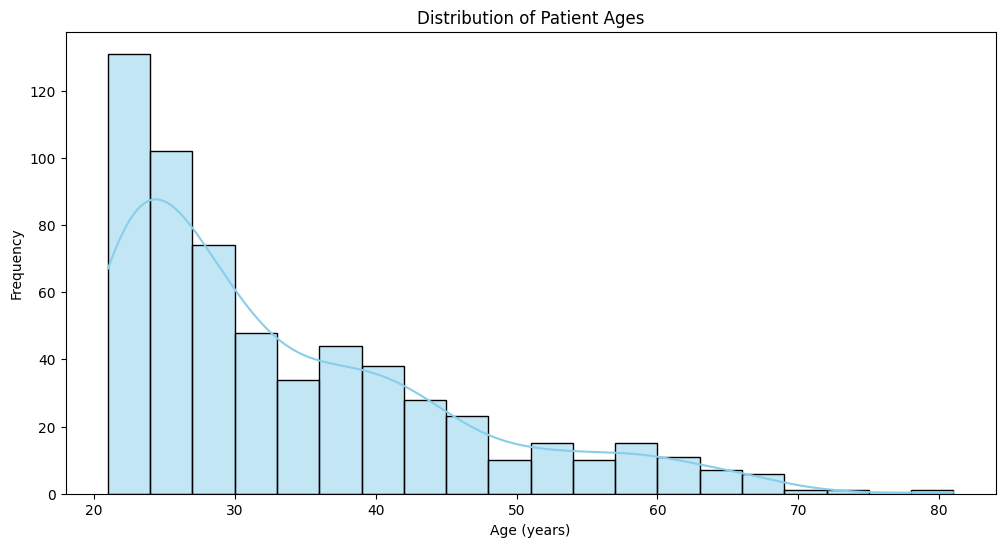

In [63]:
#Distribution of Patient Ages
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

**Remark**

From the distribution, majority of the patients were between 20 and 40 years of age

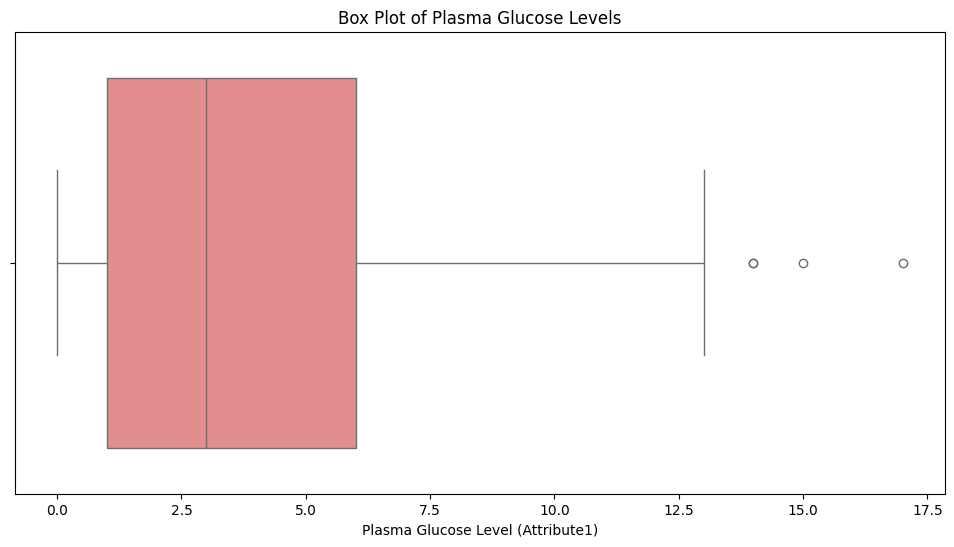

In [64]:
#Box Plot for Plasma Glucose Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['Plasma_glucose'], color='lightcoral')
plt.title('Box Plot of Plasma Glucose Levels')
plt.xlabel('Plasma Glucose Level (Attribute1)')
plt.show()

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\1629044216.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




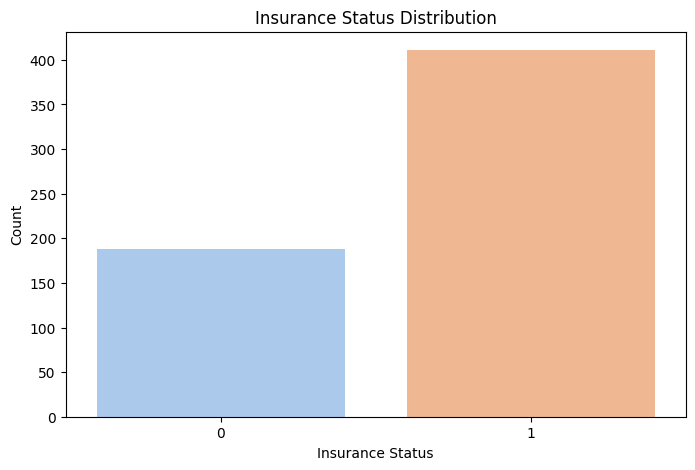

In [65]:
#Bar Chart for Insurance Status
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['Insurance'], palette='pastel')
plt.title('Insurance Status Distribution')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

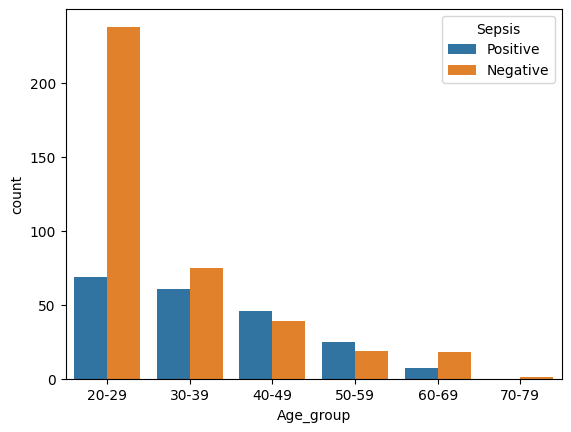

In [66]:
#Relationship between Age and Sepsis
# Create the bin edges for the age groups
bins = list(range(20, 81, 10))

# Create the bin labels for the age groups (7 labels for 8 bins)
basket = ['{0}-{1}'.format(i, i + 9) for i in range(20, 81, 10)[:-1]]

# Use pd.cut() to assign age groups to each 'Age' value
train_data['Age_group'] = pd.cut(train_data['Age'], bins=bins, labels=basket, right=False)

# Plot the count of each age group colored by 'Sepsis'
sns.countplot(data=train_data, x='Age_group', hue='Sepsis');

**Remarks**

It is observed that relatively, the age group 20-29 are less succeptible to sepsis as compared to those from the ages 0f 30-59  and those between the ages of 60-69 are the most suceptible to sepsis. This can be attributed to the fact that as one ages, one becomes succeptible to sepsis due to weakening ot the immune system

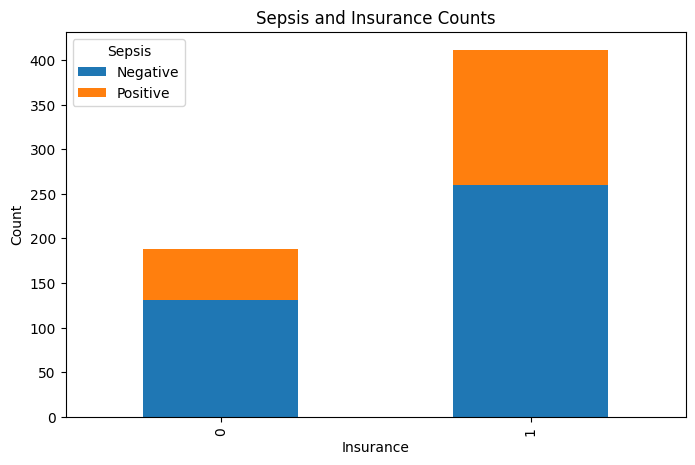

In [67]:
#Realtionship between Insurance and Sepsis
grouped = train_data.groupby(['Sepsis', 'Insurance'], as_index=False)['ID'].count()
# Pivot the data to have Sepsis as columns and Insurance as index
pivot = grouped.pivot(index='Insurance', columns='Sepsis', values='ID')
# Plotting
pivot.plot(kind='bar', stacked=True, figsize=(8, 5))
# Setting labels and title
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Sepsis and Insurance Counts')
plt.show()

**Remarks**

From the plot the number of patients with insurance were more than those without insurance. More than half of the insured patients tested negative to sepsis and this was also the true for patients without insurance.

In [68]:
#Realtionship between BMI and the number of patients
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['Body_mass_index'] <= 18.5):
        return 'Under Weight'
    elif (row['Body_mass_index'] > 18.5) and (row['Body_mass_index'] <= 24.9):
        return 'Healthy Weight'
    elif (row['Body_mass_index'] > 24.9) and (row['Body_mass_index'] <= 29.9):
        return 'Over Weight'
    elif (row['Body_mass_index'] > 29.9) and (row['Body_mass_index'] < 40):
        return 'Obesity'
    elif row['Body_mass_index'] >= 40:
        return 'Severe Obesity'

In [69]:
train_data = train_data.copy()

In [70]:
train_data['BMI_Ranges'] = train_data.apply(create_bmi_range, axis=1)
range_count = train_data['BMI_Ranges'].value_counts()

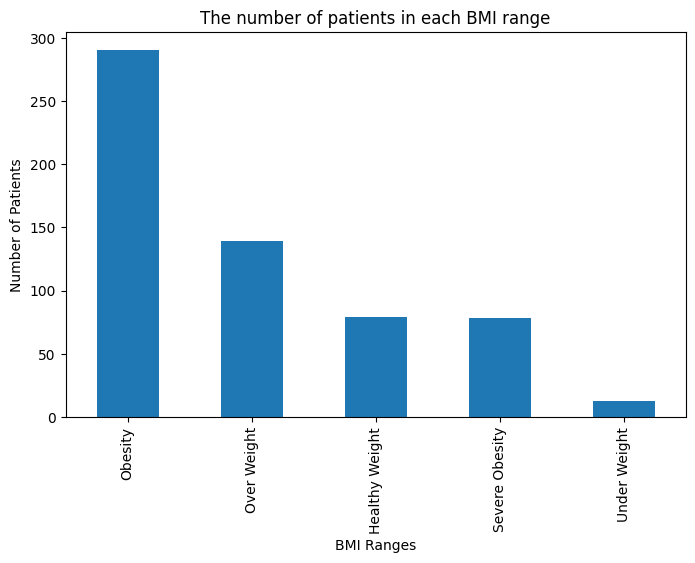

In [71]:
# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('BMI Ranges')
plt.ylabel('Number of Patients')
plt.show()

**Remarks**

From the graph,it is evident that most of the of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

In [72]:
#Relationship between body mass and sepsis
body_mass = train_data.groupby(['Sepsis', 'BMI_Ranges'], as_index=False)['ID'].count()
body_mass

,Sepsis,BMI_Ranges,ID
0,Negative,Healthy Weight,75
1,Negative,Obesity,159
2,Negative,Over Weight,110
3,Negative,Severe Obesity,35
4,Negative,Under Weight,12
5,Positive,Healthy Weight,4
6,Positive,Obesity,131
7,Positive,Over Weight,29
8,Positive,Severe Obesity,43
9,Positive,Under Weight,1


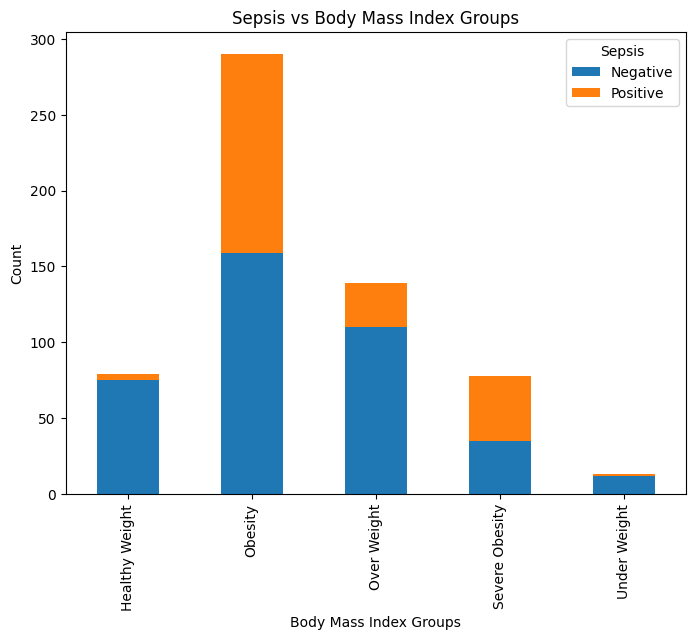

In [73]:
# Pivot the data to have Sepsis as columns and Insurance as index
bmi_pivot = body_mass.pivot(index='BMI_Ranges', columns='Sepsis', values='ID')
# Plotting
bmi_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
# Setting labels and title
plt.xlabel('Body Mass Index Groups')
plt.ylabel('Count')
plt.title('Sepsis vs Body Mass Index Groups')
plt.show();

**Remark**

From the graph, almost half of patients who were obesed and severely obesed had sepsis. Patients who were overweight were also prone to sepsis. Few patients with healthy weight had sepsis. This shows that body mass index influences one's chances of developing Sepsis.

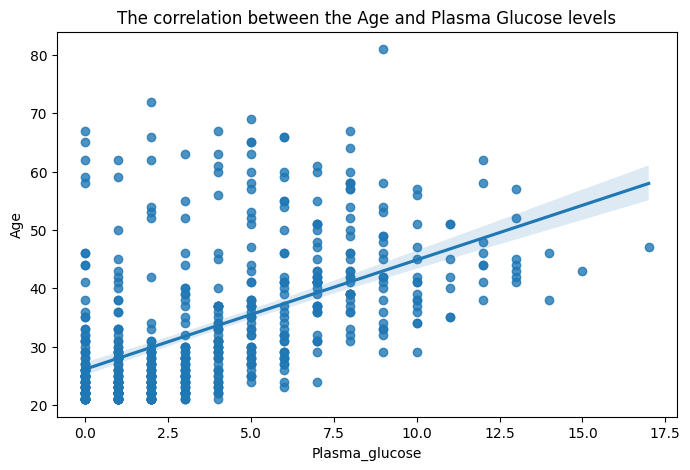

In [74]:
#Relationship between plasma glucose level and age
plt.figure(figsize=(8, 5))
sns.regplot(x='Plasma_glucose', y='Age', data=train_data)
plt.title('The correlation between the Age and Plasma Glucose levels')
plt.show()

In [75]:
corr_ = train_data['Plasma_glucose'].corr(train_data['Age'])
round(corr_, 6)

np.float64(0.532545)

**Remark**

It is observed that there is a strong positive correlation between Plasma glucose levels and age. This indicates that with an increase age, there's a tendency for blood sugar level to increase

### Multivariate analysis

In [76]:
#Relationship between Body mass index, blood pressure and Sepsis
from plotly.offline import iplot
fig_3=px.scatter(train_data, x="Body_mass_index", y= "Blood_Pressure",color= "Sepsis", 
                 title= "Relationship Between Blood Pressure and Body mass index with Relation To Sepsis")

iplot(fig_3)

In [79]:
# Replace "Positive" with 1 and "Negative" with 0
train_data['Sepsis'] = train_data['Sepsis'].replace({'Positive': 1, 'Negative': 0})

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3213783336.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [80]:
print(train_data.dtypes)


ID                       object
Plasma_glucose            int64
Blood_Work_Result_1       int64
Blood_Pressure            int64
Blood_Work_Result_2       int64
Blood_Work_Result_3       int64
Body_mass_index         float64
Blood_Work_Result_4     float64
Age                       int64
Insurance                 int64
Sepsis                    int64
Age_group              category
BMI_Ranges               object
dtype: object


In [81]:

train_data = train_data.drop([ 'ID', 'BMI_Ranges', 'Age_group'], axis=1)

In [82]:
print(train_data.dtypes)



Plasma_glucose           int64
Blood_Work_Result_1      int64
Blood_Pressure           int64
Blood_Work_Result_2      int64
Blood_Work_Result_3      int64
Body_mass_index        float64
Blood_Work_Result_4    float64
Age                      int64
Insurance                int64
Sepsis                   int64
dtype: object


In [83]:
corr_matrix = train_data.corr()
corr_matrix

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance,Sepsis
Plasma_glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631,0.207115
Blood_Work_Result_1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993,0.449719
Blood_Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365,0.061086
Blood_Work_Result_2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360,0.075585
Blood_Work_Result_3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560,0.145892
Body_mass_index,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826,0.315894
Blood_Work_Result_4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114,0.181561
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368,0.210234
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000,0.062582
Sepsis,0.207115,0.449719,0.061086,0.075585,0.145892,0.315894,0.181561,0.210234,0.062582,1.000000


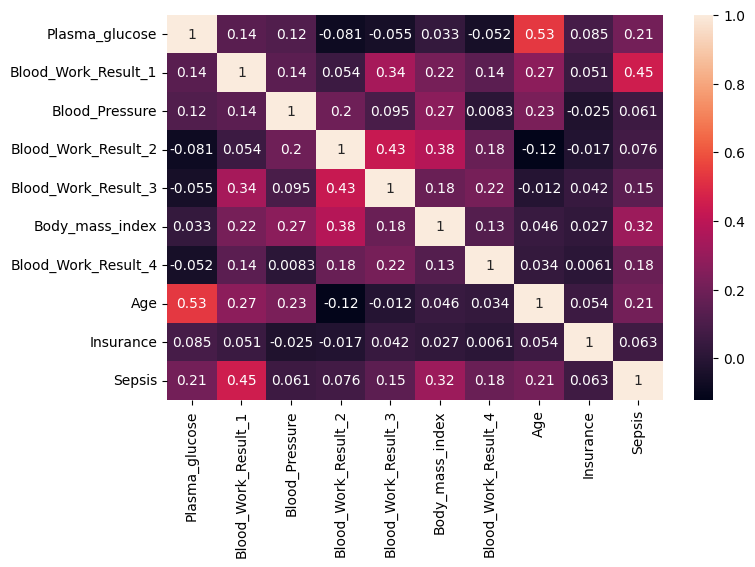

In [84]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

**Remarks**

There was a strong correlation (0.53) between Plasma Glucose and Age and it was the highest correlation. This give an indication that as one ages, there is a tendency for one's plasma glucose level to increase.
The lowest correlation was -0.012 between Blood Work Result-3 and Age.

## Feature Processing

In [85]:
#In this section, the dataset is cleaned and the best features are processed for the models.
train_data.columns

Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis'],
      dtype='object')

In [86]:
print(train_data.dtypes)

Plasma_glucose           int64
Blood_Work_Result_1      int64
Blood_Pressure           int64
Blood_Work_Result_2      int64
Blood_Work_Result_3      int64
Body_mass_index        float64
Blood_Work_Result_4    float64
Age                      int64
Insurance                int64
Sepsis                   int64
dtype: object


In [87]:
#counting the unique values in the target(sepsis)

train_data.Sepsis.value_counts()

Sepsis
0    391
1    208
Name: count, dtype: int64

### Splitting the data

In [88]:
X = train_data.drop('Sepsis', axis=1)
y = train_data.Sepsis

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#checking shape after splitting
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((479, 9), (120, 9), (479,), (120,))

In [90]:
X_train

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance
145,0,102,75,23,0,0.0,0.572,21,1
9,8,125,96,0,0,0.0,0.232,54,1
375,12,140,82,43,325,39.2,0.528,58,1
522,6,114,0,0,0,0.0,0.189,26,1
188,8,109,76,39,114,27.9,0.640,31,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1
106,1,96,122,0,0,22.4,0.207,27,1
270,10,101,86,37,0,45.6,1.136,38,0
435,0,141,0,0,0,42.4,0.205,29,1


In [91]:
# checking for missing values
X_train.isna().sum()

Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

In [92]:
y_train

145    0
9      1
375    1
522    0
188    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Sepsis, Length: 479, dtype: int64

In [93]:
y_train.isna().sum()

np.int64(0)

In [94]:
# check for datatypes
def check_dtypes(data_frame):
    dtypes_dict = data_frame.dtypes.to_dict()
    return dtypes_dict

check_dtypes(X_train)

{'Plasma_glucose': dtype('int64'),
 'Blood_Work_Result_1': dtype('int64'),
 'Blood_Pressure': dtype('int64'),
 'Blood_Work_Result_2': dtype('int64'),
 'Blood_Work_Result_3': dtype('int64'),
 'Body_mass_index': dtype('float64'),
 'Blood_Work_Result_4': dtype('float64'),
 'Age': dtype('int64'),
 'Insurance': dtype('int64')}

In [95]:
numerical_attributes= X_train.columns

### Detecting imbalance

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\1119200391.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




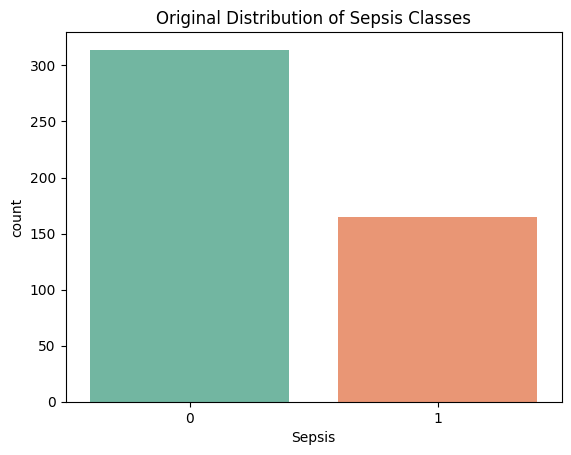

Sepsis
0    314
1    165
Name: count, dtype: int64


In [96]:
# Count and plot the distribution of the original 'Sepsis' classes
sns.countplot(x=y_train, palette='Set2')
plt.title('Original Distribution of Sepsis Classes')
plt.show()

# Check the distribution of values in the 'Sepsis' column
sepsis_distribution = y_train.value_counts()

# Print the distribution
print(sepsis_distribution)

Dataset is imbalanced so we can't use Accuracy Score to choose our model

To solve this issue: we'll oversample our minority class using RandomOverSampler

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\694402632.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




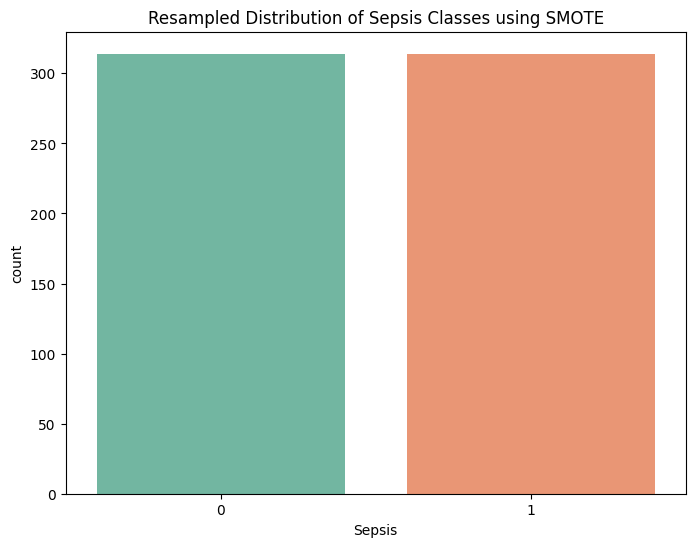

Sepsis
0    314
1    314
Name: count, dtype: int64


In [97]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count and plot the distribution of the resampled 'Sepsis' classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Resampled Distribution of Sepsis Classes using SMOTE')
plt.show()

# Check the distribution of values in the 'Sepsis' column
sepsis_distribution = y_resampled.value_counts()

# Print the distribution
print(sepsis_distribution)

## **Feature Scaling**

In [98]:
# Create an instance of StandardScaler and set output to be a DataFrame
scaler = StandardScaler().fit(X_train).set_output (transform="pandas")

# Scale the training data
X_train_df = scaler.transform(X_train)

# Scale the test data using the same scaler
X_test_df = scaler.transform(X_test)

## **Modelling and Evaluation**

In [100]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train and evaluate each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Specify 'binary' for binary classification
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred)

    # Create a new DataFrame for the results
    new_row = pd.DataFrame([{
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }])

    # Concatenate the new row to the results DataFrame
    results_df = pd.concat([results_df, new_row], ignore_index=True)



Evaluating Logistic Regression...

Evaluating Random Forest...


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\4206226768.py:59: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Evaluating XGBoost...

Evaluating K Nearest Neighbors...

Evaluating Support Vector Machines...

Evaluating Decision Tree...

Evaluating Gradient Boosting...


In [106]:
# Display the results DataFrame
print("\nResults Summary:")
results_df


Results Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.758333,0.684211,0.604651,0.641975,0.724404
1,Random Forest,0.708333,0.590909,0.604651,0.597701,0.685442
2,XGBoost,0.733333,0.617021,0.674419,0.644444,0.720326
3,K Nearest Neighbors,0.716667,0.609756,0.581395,0.595238,0.686802
4,Support Vector Machines,0.725000,0.631579,0.558140,0.592593,0.688161
5,Decision Tree,0.708333,0.605263,0.534884,0.567901,0.670039
6,Gradient Boosting,0.758333,0.659091,0.674419,0.666667,0.739807


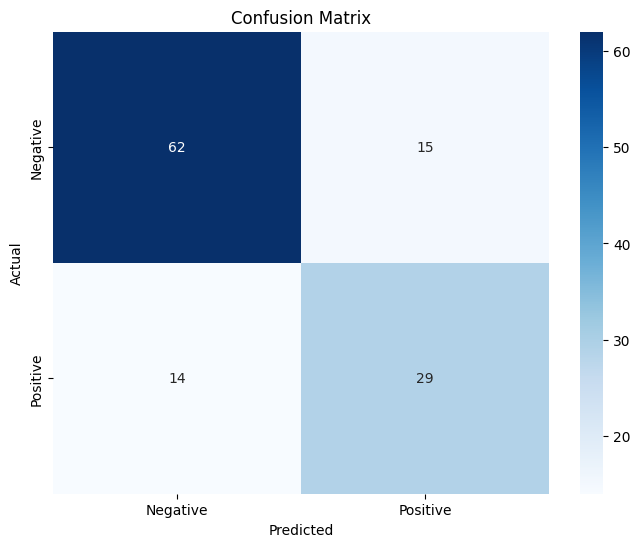

In [107]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

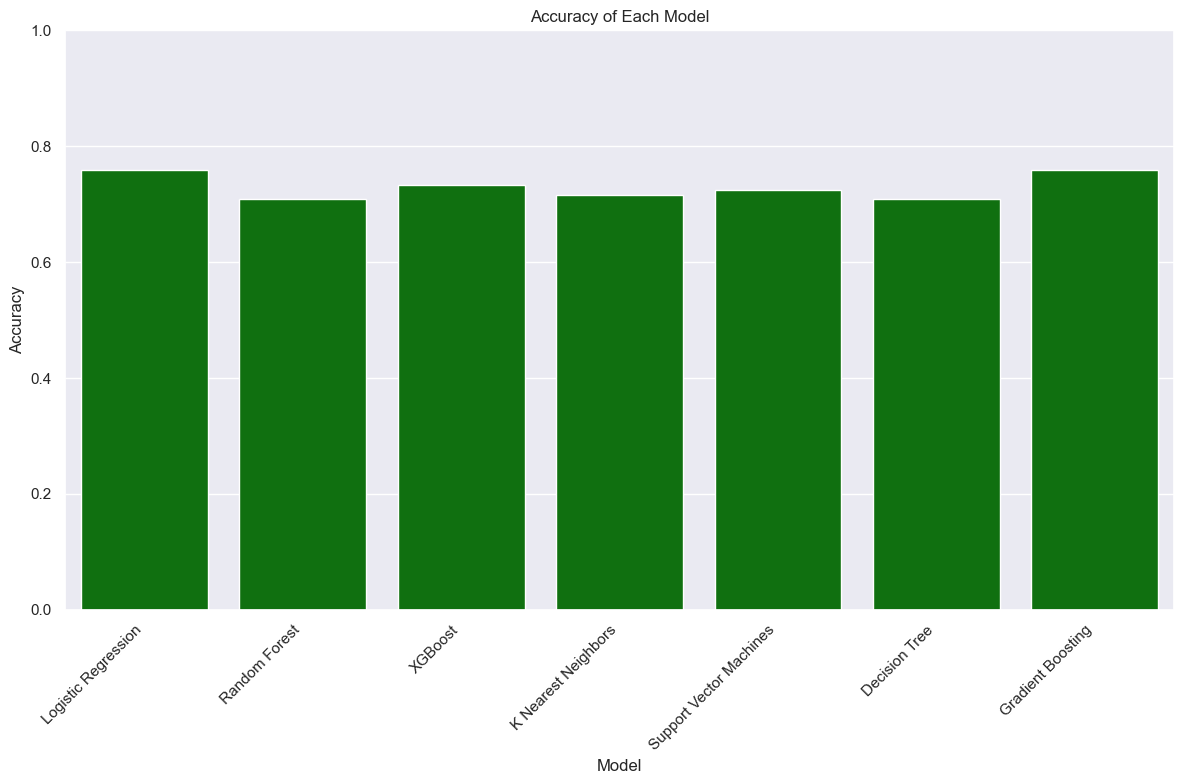

In [108]:
# Set the style for seaborn
sns.set(style="darkgrid")

# Plot the accuracy of each model using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()

In [113]:
#k-Fold Cross Validation
def kfold_cross_validation(model, X, y, num_folds=5):
    """
    Perform k-fold cross-validation for a given model.

    Parameters:
    - model: Machine learning model.
    - X: Features.
    - y: Target variable.
    - num_folds: Number of folds for cross-validation.

    Returns:
    - results_df: DataFrame containing cross-validation results.
    """
    # Initialize StratifiedKFold
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize DataFrame to store results
    results_df = pd.DataFrame(columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

    # Iterate over folds
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Append results to the DataFrame
        # Append results to the DataFrame using pd.concat
        results_df = pd.concat([results_df, pd.DataFrame([{
            'Fold': fold + 1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }])], ignore_index=True)

    return results_df


In [114]:
# Initialize the models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize DataFrame to store results
all_results_df = pd.DataFrame(columns=['Model', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Perform k-fold cross-validation for each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Get cross-validation results for the model
    cv_results = kfold_cross_validation(model, X, y, num_folds=5)
    
    # Add a 'Model' column to the results to keep track of which model was evaluated
    cv_results['Model'] = name
    
    # Append the results to the overall DataFrame
    all_results_df = pd.concat([all_results_df, cv_results], ignore_index=True)

# Display the cross-validation results DataFrame
print("\nCross-Validation Results for All Models:")
print(all_results_df)



Evaluating Logistic Regression...


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM


Evaluating Random Forest...


C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Evaluating XGBoost...


C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Evaluating K Nearest Neighbors...


C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Evaluating Support Vector Machines...


C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Evaluating Decision Tree...

Evaluating Gradient Boosting...


C:\Users\debor\AppData\Local\Temp\ipykernel_16560\3167714180.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Cross-Validation Results for All Models:
                      Model Fold  Accuracy  Precision    Recall  F1 Score  \
0       Logistic Regression    1  0.775000   0.727273  0.571429  0.640000   
1       Logistic Regression    2  0.741667   0.648649  0.571429  0.607595   
2       Logistic Regression    3  0.783333   0.700000  0.666667  0.682927   
3       Logistic Regression    4  0.716667   0.652174  0.365854  0.468750   
4       Logistic Regression    5  0.764706   0.696970  0.560976  0.621622   
5             Random Forest    1  0.758333   0.666667  0.619048  0.641975   
6             Random Forest    2  0.758333   0.658537  0.642857  0.650602   
7             Random Forest    3  0.758333   0.651163  0.666667  0.658824   
8             Random Forest    4  0.733333   0.666667  0.439024  0.529412   
9             Random Forest    5  0.848739   0.896552  0.634146  0.742857   
10                  XGBoost    1  0.675000   0.540541  0.476190  0.506329   
11                  XGBoost    2  

C:\Users\debor\AppData\Local\Temp\ipykernel_16560\1819172776.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




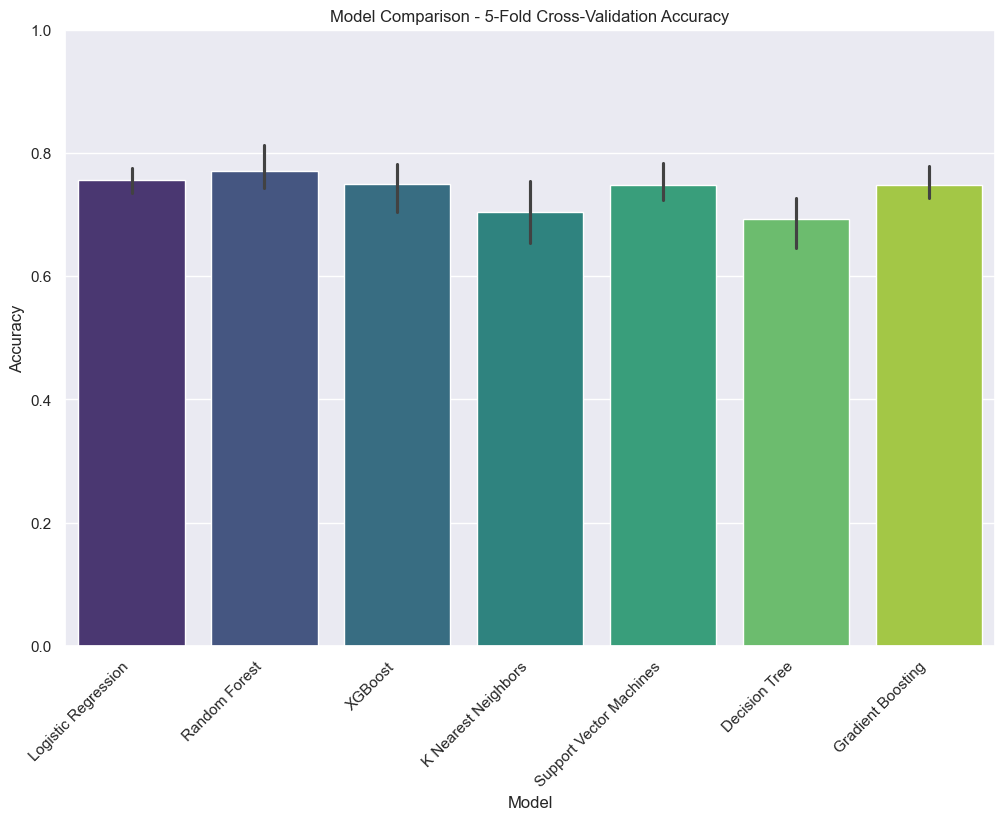

In [115]:
# Filter the DataFrame to include only the accuracy results
accuracy_results_all_models = all_results_df[['Model', 'Accuracy']]

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=accuracy_results_all_models, palette='viridis')
plt.title('Model Comparison - 5-Fold Cross-Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [118]:
# Filter the DataFrame to include only the accuracy results for the 5th fold
accuracy_results_5th_fold = all_results_df[all_results_df['Fold'] == 5][['Model', 'Accuracy']]

# Print the accuracy for the 5th fold for each model
print("\nAccuracy for the 5th Fold:")
accuracy_results_5th_fold


Accuracy for the 5th Fold:


,Model,Accuracy
4,Logistic Regression,0.764706
9,Random Forest,0.848739
14,XGBoost,0.823529
19,K Nearest Neighbors,0.789916
24,Support Vector Machines,0.815126
29,Decision Tree,0.722689
34,Gradient Boosting,0.806723


In [119]:
# Calculate the mean accuracy for each model
mean_accuracy_by_model = all_results_df.groupby('Model')['Accuracy'].mean()

# Select the top two models with the highest mean accuracy
top_two_models = mean_accuracy_by_model.nlargest(2)

# Print the two best models and their mean accuracies
print("\nTwo Best Models based on k-fold Cross-Validation:\n")
for model, mean_accuracy in top_two_models.items():
    print(f"Model: {model}, Mean Accuracy: {mean_accuracy}")


Two Best Models based on k-fold Cross-Validation:

Model: Random Forest, Mean Accuracy: 0.7714145658263305
Model: Logistic Regression, Mean Accuracy: 0.7562745098039215


# **Hyperparameters Tuning**

In [120]:
# Create hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV objects for each model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid searches to the data
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy for each model
print("Best Hyperparameters for RandomForestClassifier:")
print(grid_search_rf.best_params_)
print("Best Accuracy on Training Data:", grid_search_rf.best_score_)

print("\nBest Hyperparameters for LogisticRegression:")
print(grid_search_lr.best_params_)
print("Best Accuracy on Training Data:", grid_search_lr.best_score_)

# Evaluate the best models on the test set
best_model_rf = grid_search_rf.best_estimator_
test_accuracy_rf = best_model_rf.score(X_test, y_test)
print("\nAccuracy on Test Data (RandomForestClassifier):", test_accuracy_rf)

best_model_lr = grid_search_lr.best_estimator_
test_accuracy_lr = best_model_lr.score(X_test, y_test)
print("Accuracy on Test Data (LogisticRegression):", test_accuracy_lr)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
791 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Best Hyperparameters for RandomForestClassifier:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy on Training Data: 0.7891447368421053

Best Hyperparameters for LogisticRegression:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy on Training Data: 0.768267543859649

Accuracy on Test Data (RandomForestClassifier): 0.7333333333333333
Accuracy on Test Data (LogisticRegression): 0.775


In [121]:
# Dropping the ID column from the test data
test_data.drop("ID", axis=1, inplace=True)

In [122]:
# Use the best model to make predictions on the test dataset
predicted_sepsis = best_model_lr.predict(test_data)

# Display the predictions for the 'Sepsis' outcome
predicted_sepsis

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

## Saving the models

In [125]:
# Save the trained model
joblib.dump(best_model_rf, 'best_model_rf.pkl')

['best_model_rf.pkl']

In [124]:
# Save the preprocessor
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']